In [1]:
import pandas as pd
import numpy as np

# load data

In [2]:
channel_spend_graduate = pd.read_csv('data/advertising_spend_data.csv')

In [3]:

dictionary = pd.read_excel('data/data dictionary merged.xlsx')
# subscribers_raw = pd.read_csv('data/subscribers.csv')
# subscribers = pd.read_csv('data/subscribers.csv')

In [4]:
import pickle
subscribers = pd.read_pickle('data/subscribers')
engagement = pd.read_pickle('data/engagement')
subscribers_raw = subscribers.copy()
rep = pd.read_pickle('data/customer_service_reps')

# Data Preprocessing

## Dictionary

In [5]:
dictionary.head(40)

,field,description
0,subid,unique subscriber id
1,package_type,"customer internet package, independent from OT..."
2,num_weekly_services_utilized,number of OTT services currently subscribed to...
3,preferred_genre,"preferred content genre, self-reported upon si..."
4,intended_use,"intended OTT product usage, self-reported upon..."
5,weekly_consumption_hour,number of television or movies consumed per we...
6,num_ideal_streaming_services,"subscriber's target number of services (Mevod,..."
7,age,subscriber age
8,male_TF,"subscriber gender, True if male, False if female"
9,country,subscriber country


## engagement

In [6]:
engagement.columns

Index(['subid', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period'],
      dtype='object')

In [7]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585724 entries, 1 to 28832323
Data columns (total 9 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   subid                            int64         
 1   date                             datetime64[ns]
 2   app_opens                        float64       
 3   cust_service_mssgs               float64       
 4   num_videos_completed             float64       
 5   num_videos_more_than_30_seconds  float64       
 6   num_videos_rated                 float64       
 7   num_series_started               float64       
 8   payment_period                   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 197.3 MB


In [8]:
engagement.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [9]:
eng_mean = engagement.groupby('subid').mean().reset_index()
eng_mean.head()

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
0,20000062,1.000000,0.750000,1.500000,5.750000,0.0,0.250000,0.000000
1,20000405,1.250000,1.000000,3.250000,4.250000,0.0,0.250000,0.000000
2,20000604,0.933333,0.333333,0.533333,4.533333,0.0,0.066667,0.133333
3,20000685,1.210526,0.263158,0.368421,4.342105,0.0,0.210526,0.657895
4,20000741,0.500000,0.500000,1.000000,3.500000,0.0,0.000000,0.000000


In [10]:
eng_mean.describe()

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
count,1.350190e+05,135019.000000,135019.000000,135019.000000,135019.000000,135019.000000,135019.000000,135019.000000
mean,2.498882e+07,1.804594,0.639532,2.492495,4.685488,0.021318,0.466251,0.269793
std,2.889306e+06,1.550107,0.614903,1.599658,1.194731,0.076552,0.364733,0.387568
min,2.000006e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.248572e+07,1.000000,0.285714,1.117647,4.276923,0.000000,0.000000,0.000000
50%,2.498062e+07,1.200000,0.486486,2.375000,4.583333,0.000000,0.500000,0.000000
75%,2.749941e+07,2.166667,0.750000,3.750000,5.285714,0.000000,0.818182,0.625000
max,2.999994e+07,45.250000,13.000000,13.000000,15.000000,2.782609,2.000000,2.785714


## channel spend

In [11]:
print(channel_spend_graduate.shape)
channel_spend_graduate.head(5)

(80, 3)


,channel,date,spend_AED
0,facebook,2019/6/30,84800.0
1,facebook,2019/7/31,60000.0
2,facebook,2019/8/31,52300.0
3,facebook,2019/9/30,49000.0
4,facebook,2019/10/31,51300.0


In [12]:
pd.set_option('display.max_columns', None)

## subscribers

In [13]:
print(subscribers.shape)
subscribers.head(10)

(227628, 29)


,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,False,70.0,False,UAE,bing,tv,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 20:15:43,71.0,True,2020-03-18,False,0.0000,0.3303,ar,True,True,RAKBANK
192823,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,NaN,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter
315863,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-05 14:52:22,NaN,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK
254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-23 17:50:25,1.0,False,2020-03-09,False,0.0000,0.6606,ar,False,False,NaN
681969,23452753,economy,2.850348,drama,replace OTT,28.751405,1.888272,False,71.0,False,UAE,search,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-21 14:17:53,4.0,False,2020-02-05,False,0.0000,0.3303,ar,False,False,NaN


In [14]:
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

### data -- check null (categorical)

category改成 not specified和 not have
num_ideal_streaming_servies，num_weekly_services_utilized 算category


In [15]:
# subscribers['male_TF'] = subscribers['male_TF'].astype(str)
# subscribers['retarget_TF'] = subscribers['retarget_TF'].astype(str)
#subscribers['renew'] = subscribers['renew'].astype(str)

In [16]:
# subscribers.num_weekly_services_utilized = subscribers.num_weekly_services_utilized.astype(str)
# subscribers.num_ideal_streaming_services = subscribers.num_ideal_streaming_services.astype(str)

In [17]:
subscribers['intended_use'].fillna('not_specified', inplace=True)
subscribers['package_type'].fillna('not_specified', inplace=True)
subscribers['preferred_genre'].fillna('not_specified', inplace=True)
# subscribers['male_TF'].fillna('not_specified', inplace=True)
subscribers['attribution_survey'].fillna('not_specified', inplace=True)
subscribers['op_sys'].fillna('not_specified', inplace=True)
#subscribers['renew'].fillna('not_specified', inplace=True)
subscribers['payment_type'].fillna('not_specified', inplace=True)
#subscribers['last_payment'].fillna('not_have', inplace=True)
#subscribers['next_payment'].fillna('not_have', inplace=True)
#subscribers['cancel_date'].fillna('not_have', inplace=True)
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  227628 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               227628 non-null  object        
 4   intended_use                  227628 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [18]:
#subscribers.creation_until_cancel_days.value_counts()

In [19]:
subscribers.num_weekly_services_utilized.fillna(0, inplace=True)
subscribers.num_ideal_streaming_services .fillna(0, inplace=True)
subscribers.creation_until_cancel_days.fillna(0, inplace=True)
subscribers.age.fillna(0, inplace=True)
subscribers.revenue_net.fillna(0, inplace=True)
subscribers['weekly_consumption_hour'].fillna(0, inplace=True) #assume no consumption
subscribers['join_fee'].fillna(0, inplace=True) #assume no join fee
#subscribers['age'].fillna((subscribers.age.mean()), inplace=True) # cannot assume, delete
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  227628 non-null  object        
 2   num_weekly_services_utilized  227628 non-null  float64       
 3   preferred_genre               227628 non-null  object        
 4   intended_use                  227628 non-null  object        
 5   weekly_consumption_hour       227628 non-null  float64       
 6   num_ideal_streaming_services  227628 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           227628 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [20]:
#subscribers.renew.value_counts()

### data -- numeric
把异常值删掉-- 如果有异常值说明不可信任

In [21]:
subscribers.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,creation_until_cancel_days,revenue_net,join_fee
count,2.276280e+05,227628.000000,227628.000000,227628.000000,2.276280e+05,227628.0,227628.000000,227628.000000,227628.000000,227628.000000,227628.000000
mean,2.498624e+07,1.543598,23.332421,1.014367,6.408667e+02,4.0,4.732049,4.512188,11.048386,1.318552,0.097489
std,2.885543e+06,1.592010,11.379402,1.015490,1.765648e+05,0.0,0.101049,0.097078,30.240349,2.878973,0.168040
min,2.000001e+07,0.000000,-32.146760,-0.919933,0.000000e+00,4.0,0.807400,0.770700,-108.000000,-5.982100,-0.660600
25%,2.248998e+07,0.000000,22.951579,0.000000,2.800000e+01,4.0,4.734300,4.514100,0.000000,0.000000,0.000000
50%,2.497011e+07,2.158123,25.851492,1.730242,4.200000e+01,4.0,4.734300,4.514100,2.000000,0.000000,0.036700
75%,2.749020e+07,2.773761,30.201361,1.910251,5.500000e+01,4.0,4.734300,4.514100,11.000000,0.000000,0.036700
max,2.999998e+07,14.335378,76.599962,6.955714,8.172000e+07,4.0,5.101300,5.027900,312.000000,15.634200,0.734000


In [22]:
print(subscribers.num_ideal_streaming_services.value_counts())

0.000000    112170
1.887105       307
1.887379       306
1.887104       298
1.887378       293
             ...  
1.830122         1
1.822605         1
2.572426         1
1.797060         1
1.884843         1
Name: num_ideal_streaming_services, Length: 25379, dtype: int64


NA
num_ideal_streaming_services: contain negative
weekly_consumption_hour: min of weekly consumption hour  -32 --- delete all less than 0,且删掉>50的，理由同num_weekly_services_utilized

age: max of age 81720000.0, min 0 -- delete age < 0, > 150

num_ideal_streaming_services: min -1.000000	

join fee: contain negative value -- min -0.660600

num_weekly_services_utilized：75%是二点几 最大的9点几 -- 目的不是cover所有人，而是对大部分人精准打击，所以删到4

In [23]:
# subscribers.weekly_consumption_hour = subscribers.weekly_consumption_hour.apply(lambda x: x if x >= 0 else -999)
# subscribers.age = subscribers.age.apply(lambda x: x if (x >= 0 and x <= 150) else -999)
# subscribers.num_ideal_streaming_services = subscribers.age.apply(lambda x: x if x >= 0 else -999)
# subscribers.join_fee = subscribers.join_fee.apply(lambda x: x if x >= 0 else -999)

In [24]:
# if the below are missing value -- do not make sense, so delete

In [25]:
subscribers = subscribers[(subscribers.weekly_consumption_hour >= 0)&(subscribers.weekly_consumption_hour <= 50)]
subscribers = subscribers[(subscribers.age < 100) & (subscribers.age >= 0) | (subscribers.age == -999)]
subscribers = subscribers[(subscribers.num_ideal_streaming_services) >= 0]
subscribers = subscribers[(subscribers.join_fee >= 0)]
subscribers = subscribers[(subscribers.creation_until_cancel_days >= 0) | (subscribers.creation_until_cancel_days == -999)]
subscribers = subscribers[(subscribers.num_weekly_services_utilized >= 0) & (subscribers.num_weekly_services_utilized <= 5)]


In [26]:
subscribers.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,creation_until_cancel_days,revenue_net,join_fee
count,2.239420e+05,223942.000000,223942.000000,223942.000000,223942.000000,223942.0,223942.000000,223942.000000,223942.000000,223942.000000,223942.000000
mean,2.498721e+07,1.497786,23.190369,0.995200,38.947376,4.0,4.732173,4.512308,11.024797,1.305529,0.097110
std,2.885966e+06,1.539032,11.345688,1.003122,21.165180,0.0,0.098878,0.095050,30.216631,2.867592,0.167703
min,2.000001e+07,0.000000,0.000000,0.000000,0.000000,4.0,0.807400,0.770700,0.000000,-5.982100,0.000000
25%,2.248967e+07,0.000000,22.951579,0.000000,28.000000,4.0,4.734300,4.514100,0.000000,0.000000,0.000000
50%,2.497224e+07,2.110991,25.851492,1.684443,42.000000,4.0,4.734300,4.514100,2.000000,0.000000,0.036700
75%,2.749200e+07,2.759033,30.201361,1.906788,55.000000,4.0,4.734300,4.514100,11.000000,0.000000,0.036700
max,2.999998e+07,4.999189,49.050793,3.380440,99.000000,4.0,5.101300,5.027900,312.000000,15.634200,0.734000


In [27]:
subscribers.shape

(223942, 29)

In [28]:
subscribers.account_creation_date = subscribers.account_creation_date.apply(lambda x:pd.to_datetime(x))

### data -- check categorical

In [29]:
print('gender','\n',subscribers.male_TF.value_counts(),'\n')
print('op_sys','\n',subscribers.op_sys.value_counts(),'\n')
#print('age','\n',subscribers.age.value_counts(),'\n')
print('language','\n',subscribers.language.value_counts(),'\n')
print('country','\n',subscribers.country.value_counts(),'\n')
print('intended_use\n',subscribers.intended_use.value_counts(),'\n')
print('package_type\n',subscribers.package_type.value_counts(),'\n')
print('preferred_genre\n',subscribers.preferred_genre.value_counts(),'\n')
print('num_ideal_streaming_services\n',subscribers.num_ideal_streaming_services.value_counts(),'\n')
#print('current_sub_TF\n',subscribers.current_sub_TF.value_counts(),'\n')
#print('current_sub_TF\n',subscribers.current_sub_TF.value_counts(),'\n')
#print('trial_completed\n',subscribers.trial_completed_TF.value_counts(),'\n')

gender 
 False    198401
True      25272
Name: male_TF, dtype: int64 

op_sys 
 iOS              142063
Android           68708
not_specified     13171
Name: op_sys, dtype: int64 

language 
 ar    223942
Name: language, dtype: int64 

country 
 UAE    223942
Name: country, dtype: int64 

intended_use
 access to exclusive content    87529
replace OTT                    68265
supplement OTT                 26180
expand regional access         13705
expand international access    12775
other                           6973
education                       5042
not_specified                   3473
Name: intended_use, dtype: int64 

package_type
 base             109806
enhanced          62307
not_specified     34869
economy           16960
Name: package_type, dtype: int64 

preferred_genre
 comedy           123857
drama             45774
not_specified     35611
regional           8893
international      6030
other              3777
Name: preferred_genre, dtype: int64 

num_ideal_streaming_s

In [30]:
# add age_range
subscribers['age_range'] = subscribers.age.apply(lambda x:'unknown' if x == 0 else('<18' if x < 18 else('18-24' if x < 25 else ( '25-34' if x < 35 else ('35-44' if x < 45 else('45-54' if x < 55 else ('55-64' if x < 65 else '>65')))))))



In [31]:

subscribers.age_range.value_counts()

45-54      44953
35-44      42709
55-64      36320
unknown    35232
25-34      33556
>65        20444
18-24      10724
<18            4
Name: age_range, dtype: int64

In [32]:
subscribers.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,age_range
162502,21724479,economy,0.000000,comedy,access to exclusive content,0.000000,0.000000,False,0.0,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,0.0,True,2020-02-08,False,0.0,0.0000,ar,True,False,Standard Charter,unknown
380374,23383224,base,0.000000,comedy,access to exclusive content,22.951579,0.000000,False,70.0,False,UAE,facebook,facebook,not_specified,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,not_specified,>65
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,not_specified,25-34
356799,29417030,base,0.000000,drama,replace OTT,20.051667,0.000000,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,not_specified,25-34
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,not_specified,25-34


## rep

In [33]:
rep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208643 entries, 4 to 2248413
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   customer_service_rep_id  int64         
 1   subid                    int64         
 2   current_sub_TF           bool          
 3   cancel_date              datetime64[ns]
 4   account_creation_date    datetime64[ns]
 5   num_trial_days           int64         
 6   trial_completed_TF       bool          
 7   billing_channel          object        
 8   revenue_net_1month       float64       
 9   payment_period           int64         
 10  last_payment             datetime64[ns]
 11  next_payment             datetime64[ns]
 12  renew                    object        
dtypes: bool(2), datetime64[ns](4), float64(1), int64(4), object(2)
memory usage: 206.4+ MB


In [34]:
rep.describe()

,customer_service_rep_id,subid,num_trial_days,revenue_net_1month,payment_period
count,2.208643e+06,2.208643e+06,2.208643e+06,2.208643e+06,2.208643e+06
mean,3.504146e+07,2.499531e+07,1.298418e+01,2.248010e+00,5.850402e-01
std,2.808791e+06,2.887118e+06,3.102689e+00,2.222221e+00,1.003588e+00
min,3.000466e+07,2.000000e+07,0.000000e+00,-7.596900e+00,0.000000e+00
25%,3.273768e+07,2.249642e+07,1.400000e+01,0.000000e+00,0.000000e+00
50%,3.500128e+07,2.499127e+07,1.400000e+01,1.137700e+00,0.000000e+00
75%,3.739152e+07,2.749480e+07,1.400000e+01,4.587500e+00,1.000000e+00
max,3.999743e+07,3.000000e+07,1.400000e+01,1.038610e+01,1.200000e+01


In [35]:
rep.subid.value_counts()

23509022    13
26463599    13
20890160    13
26854692    12
28103745    11
            ..
28394825     1
20022609     1
28319074     1
24137064     1
29362175     1
Name: subid, Length: 1369360, dtype: int64

# Segmentation

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [37]:
subscribers.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,age_range
162502,21724479,economy,0.000000,comedy,access to exclusive content,0.000000,0.000000,False,0.0,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,0.0,True,2020-02-08,False,0.0,0.0000,ar,True,False,Standard Charter,unknown
380374,23383224,base,0.000000,comedy,access to exclusive content,22.951579,0.000000,False,70.0,False,UAE,facebook,facebook,not_specified,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,not_specified,>65
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,not_specified,25-34
356799,29417030,base,0.000000,drama,replace OTT,20.051667,0.000000,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,not_specified,25-34
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,not_specified,25-34


In [38]:
subscribers.months_per_bill_period.value_counts()

4    223942
Name: months_per_bill_period, dtype: int64

In [39]:
seg_sub = subscribers[['preferred_genre','weekly_consumption_hour','age','male_TF','op_sys']]
#seg_sub = subscribers[['package_type','preferred_genre','intended_use','weekly_consumption_hour','age','male_TF']]
#seg_sub = subscribers[['preferred_genre','weekly_consumption_hour','age','male_TF']]
seg_sub = seg_sub[seg_sub['age'] >= 18]
seg_sub = seg_sub[seg_sub['preferred_genre'] != 'not_specified']
seg_sub = seg_sub[seg_sub['op_sys'] != 'not_specified']
#seg_sub = seg_sub[seg_sub['intended_use'] != 'not_specified']
seg_sub = seg_sub[seg_sub['weekly_consumption_hour'] != 0]
seg_sub.head()



,preferred_genre,weekly_consumption_hour,age,male_TF,op_sys
496617,regional,36.001186,25.0,True,iOS
356799,drama,20.051667,30.0,False,Android
681701,comedy,22.951579,28.0,False,iOS
192823,comedy,20.051667,61.0,False,Android
315863,drama,34.551230,23.0,False,iOS


In [40]:
seg_sub.shape

(141991, 5)

In [41]:
seg_sub_dummy = seg_sub.join(pd.get_dummies(seg_sub[['preferred_genre','male_TF','op_sys']]))
#seg_sub_dummy = seg_sub.join(pd.get_dummies(seg_sub[['preferred_genre','male_TF']]))
#del seg_sub_dummy['package_type']
del seg_sub_dummy['preferred_genre']
#del seg_sub_dummy['intended_use']
del seg_sub_dummy['male_TF']
del seg_sub_dummy['op_sys']

seg_sub_dummy.head()

,weekly_consumption_hour,age,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
496617,36.001186,25.0,0,0,0,0,1,0,1,0,1
356799,20.051667,30.0,0,1,0,0,0,1,0,1,0
681701,22.951579,28.0,1,0,0,0,0,1,0,0,1
192823,20.051667,61.0,1,0,0,0,0,1,0,1,0
315863,34.551230,23.0,0,1,0,0,0,1,0,0,1


In [42]:
seg_sub_dummy.describe()

,weekly_consumption_hour,age,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
count,141991.000000,141991.000000,141991.000000,141991.000000,141991.000000,141991.000000,141991.000000,141991.000000,141991.000000,141991.000000,141991.000000
mean,27.975943,45.580334,0.636111,0.247903,0.035277,0.024593,0.056116,0.868942,0.131058,0.348804,0.651196
std,4.820909,13.843092,0.481119,0.431797,0.184479,0.154882,0.230147,0.337465,0.337465,0.476593,0.476593
min,2.652191,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.401536,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,27.301448,45.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,30.201361,56.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,49.050793,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()

segment_df_dummy_scale = pd.DataFrame(scaler.fit_transform(seg_sub_dummy[['age','weekly_consumption_hour']])).rename(columns={0:'age_scale',1:'weekly_consumption_hour_scale'})

segment_df_dummy_reindex = seg_sub_dummy.reset_index(drop=True)
segment_df_dummy_scale = pd.concat([segment_df_dummy_scale,segment_df_dummy_reindex],axis=1)
segment_df_dummy_scale.drop(columns=['age','weekly_consumption_hour'],inplace=True)


In [44]:
segment_df_dummy_scale

,age_scale,weekly_consumption_hour_scale,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
0,-1.486691,1.664680,0,0,0,0,1,0,1,0,1
1,-1.125499,-1.643737,0,1,0,0,0,1,0,1,0
2,-1.269976,-1.042206,1,0,0,0,0,1,0,0,1
3,1.113893,-1.643737,1,0,0,0,0,1,0,1,0
4,-1.631168,1.363915,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
141986,-0.186399,-0.741441,0,1,0,0,0,1,0,0,1
141987,-0.547592,0.160854,1,0,0,0,0,1,0,0,1
141988,0.247031,-0.139911,1,0,0,0,0,1,0,0,1
141989,-0.041922,0.762385,1,0,0,0,0,1,0,0,1


In [45]:
#define function to find the best k number        
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,10)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
        #inertia_ reports the within group sum of squared errors, which is W in this Jupyter.
    plt.plot(K, Sum_of_squared_distances, 'darkorange')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.savefig('elbowmethod.png')
    plt.show()
    return 

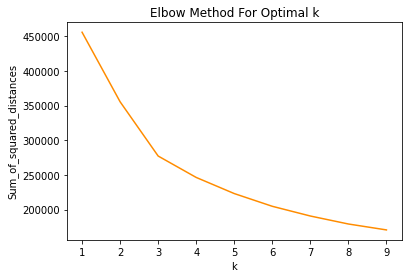

In [46]:
fitting(segment_df_dummy_scale)

In [47]:
#kmeans = KMeans(n_clusters=3, random_state=404).fit(segment_df_dummy_scale)

In [48]:
#np.round(kmeans.cluster_centers_,2)

In [49]:
# add clusters into the data table

kmeans = KMeans(n_clusters = 3, random_state=799).fit(segment_df_dummy_scale.reset_index(drop=True))

km_label = pd.DataFrame(kmeans.labels_,columns=['cluster'])
# km_label = list(kmeans3.labels_)
# segment_df_dummy['cluster'] = km_label
segment_df_km = pd.concat([seg_sub_dummy.reset_index(drop=True),km_label],axis=1)

segment_summary = segment_df_km.groupby('cluster')
round(segment_summary.mean(),2)

,weekly_consumption_hour,age,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
cluster,,,,,,,,,,,
0,26.45,33.70,0.71,0.18,0.02,0.02,0.07,0.98,0.02,0.33,0.67
1,26.10,57.70,0.60,0.29,0.04,0.03,0.03,0.98,0.02,0.36,0.64
2,35.22,46.05,0.56,0.30,0.04,0.03,0.08,0.38,0.62,0.35,0.65


In [50]:
#test1 = np.round(scaler.inverse_transform(kmeans.cluster_centers_),4)


In [51]:
#result = pd.DataFrame(test1,columns = seg_sub_dummy.columns)

In [52]:
#result

In [53]:
#from sklearn_extra.cluster import KMedoids

In [54]:
#KMedoids = KMedoids(n_clusters=5, random_state=404).fit(seg_sub_dummy_scale)

In [55]:
# test1 = np.round(scaler.inverse_transform(KMedoids.cluster_centers_),2)
# result = pd.DataFrame(test1,columns = seg_sub_dummy.columns)
# result

In [56]:
# from kmodes.kprototypes import KPrototypes

In [57]:
# cat_idx = [0, 3, 4]
# mark_array=seg_sub.values

# kkk = KPrototypes(n_clusters = 3, max_iter=1).fit(mark_array,categorical=cat_idx)
# print(kkk.cluster_centroids_)

### Age & consumption

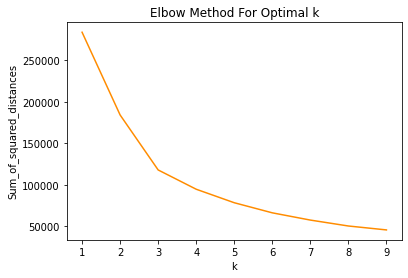

In [58]:
seg_sub_numeric = seg_sub[['weekly_consumption_hour','age']]
seg_sub_numeric_scale = scaler.fit_transform(seg_sub_numeric)
fitting(seg_sub_numeric_scale)

In [59]:
kmeans_numeric = KMeans(n_clusters=3, random_state=404).fit(seg_sub_numeric_scale)
np.round(kmeans_numeric.cluster_centers_,2)
test_numeric = np.round(scaler.inverse_transform((kmeans_numeric.cluster_centers_)),2)
result_numeric = pd.DataFrame(test_numeric,columns = seg_sub_numeric.columns)

In [60]:
result_numeric

,weekly_consumption_hour,age
0,25.85,58.04
1,25.98,33.31
2,34.36,45.31


### consumption

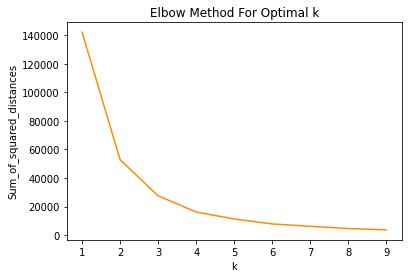

In [61]:
seg_sub_consumption = seg_sub[['weekly_consumption_hour']]
seg_sub_consumption_scale = scaler.fit_transform(seg_sub_consumption)
fitting(seg_sub_consumption_scale)

In [62]:
kmeans_consumption = KMeans(n_clusters=4, random_state=404).fit(seg_sub_consumption_scale)
np.round(kmeans_consumption.cluster_centers_,2)
test_consumption = np.round(scaler.inverse_transform((kmeans_consumption.cluster_centers_)),2)
result_consumption = pd.DataFrame(test_consumption,columns = seg_sub_consumption.columns)

In [63]:
result_consumption

,weekly_consumption_hour
0,21.63
1,30.41
2,37.06
3,25.91


### Gender & consumption

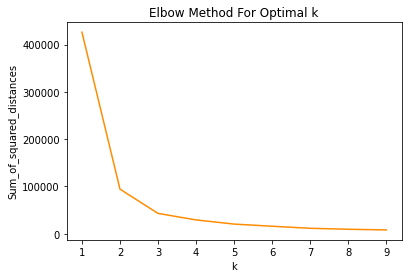

In [64]:
seg_sub_consumption_mf = seg_sub[['male_TF','weekly_consumption_hour']]
seg_sub_consumption_dummy = seg_sub_consumption_mf.join(pd.get_dummies(seg_sub[['male_TF']]))
#del seg_sub_dummy['package_type']
#del seg_sub_consumption_dummy['preferred_genre']
#del seg_sub_dummy['intended_use']
del seg_sub_consumption_dummy['male_TF']

seg_sub_consumption_mf_scale = scaler.fit_transform(seg_sub_consumption_dummy)
fitting(seg_sub_consumption_mf_scale)

In [65]:
kmeans_consumption = KMeans(n_clusters=2, random_state=404).fit(seg_sub_consumption_mf_scale)
np.round(kmeans_consumption.cluster_centers_,2)
test_numeric = np.round(scaler.inverse_transform((kmeans_consumption.cluster_centers_)),2)
result_consumption = pd.DataFrame(test_numeric,columns = seg_sub_consumption_dummy.columns)

In [66]:
result_consumption

,weekly_consumption_hour,male_TF_False,male_TF_True
0,26.89,1.0,0.0
1,35.17,-0.0,1.0


In [67]:
seg_sub[['male_TF','weekly_consumption_hour']].groupby('male_TF').mean()

,weekly_consumption_hour
male_TF,
False,26.891027
True,35.169189


### Gender & genre

In [68]:
seg_sub[['male_TF']].value_counts()

male_TF
False      123382
True        18609
dtype: int64

In [69]:
seg_sub[['male_TF','preferred_genre']].value_counts()

male_TF  preferred_genre
False    comedy             80349
         drama              29218
True     comedy              9973
False    regional            6562
True     drama               5982
False    international       4264
         other               2989
True     regional            1406
         international        745
         other                503
dtype: int64

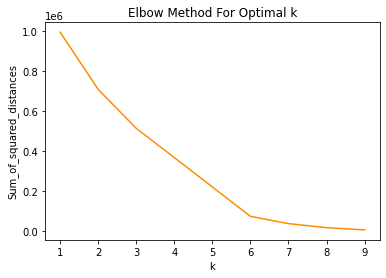

In [70]:
seg_sub_consumption_mf = seg_sub[['preferred_genre','male_TF']]
seg_sub_consumption_dummy = seg_sub_consumption_mf.join(pd.get_dummies(seg_sub[['male_TF','preferred_genre']]))
#del seg_sub_dummy['package_type']
del seg_sub_consumption_dummy['preferred_genre']
#del seg_sub_dummy['intended_use']
del seg_sub_consumption_dummy['male_TF']

seg_sub_consumption_mf_scale = scaler.fit_transform(seg_sub_consumption_dummy)
fitting(seg_sub_consumption_mf_scale)

kmeans_consumption = KMeans(n_clusters=2, random_state=404).fit(seg_sub_consumption_mf_scale)
np.round(kmeans_consumption.cluster_centers_,2)
test_numeric = np.round(scaler.inverse_transform((kmeans_consumption.cluster_centers_)),2)
result_consumption = pd.DataFrame(test_numeric,columns = seg_sub_consumption_dummy.columns)

In [71]:
result_consumption

,male_TF_False,male_TF_True,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional
0,1.0,0.0,0.65,0.24,0.03,0.02,0.05
1,-0.0,1.0,0.54,0.32,0.04,0.03,0.08


In [72]:
a = seg_sub_consumption_mf[seg_sub_consumption_mf['male_TF'] == 'True'].preferred_genre.value_counts()/seg_sub_consumption_mf[seg_sub_consumption_mf['male_TF'] == 'False'].preferred_genre.value_counts()
a

Series([], Name: preferred_genre, dtype: float64)

# Allocation 

## Allocation -- by month

In [73]:
# add account_creation_month --  year  month

In [74]:
subscribers_allocation = pd.DataFrame()
subscribers_allocation['subid'] = subscribers.subid.copy()
subscribers_allocation['account_creation_date'] = subscribers.account_creation_date.apply(lambda x:pd.to_datetime(x)).copy()
subscribers_allocation['account_creation_month']= subscribers_allocation.account_creation_date.dt.year.apply(lambda x:str(x)) + subscribers_allocation.account_creation_date.dt.month.map("{:02}".format).apply(lambda x:str(x)).copy()
subscribers_allocation['attribution_technical'] = subscribers.attribution_technical.copy()
subscribers_allocation['attribution_survey'] = subscribers.attribution_survey.copy()
subscribers_allocation['revenue_net'] = subscribers.revenue_net.copy()


In [75]:
subscribers_allocation.head()

,subid,account_creation_date,account_creation_month,attribution_technical,attribution_survey,revenue_net
162502,21724479,2020-01-24 21:44:16,202001,facebook,facebook,0.0
380374,23383224,2020-03-01 15:44:35,202003,facebook,facebook,0.0
496617,26844789,2019-12-07 16:37:06,201912,organic,facebook,0.0
356799,29417030,2020-01-27 16:09:32,202001,search,tv,0.0
681701,26723159,2019-10-05 12:57:07,201910,discovery,youtube,0.0


In [76]:
# only one attribution_technical for each person, so no need to consider last interaction or other
# just use the attribution_technical 100%

In [77]:
subscribers_allocation[['revenue_net','attribution_technical']].groupby('attribution_technical').mean().sort_values('revenue_net',ascending = False)



,revenue_net
attribution_technical,
twitter,4.594840
criteo,3.095602
bing_organic,2.971585
appstore,2.920152
internal,2.842731
direct_mail,2.798375
content_greatist,2.759840
other,2.386380
samsung,2.314285


In [78]:
attribution_technical_number_month = subscribers_allocation[['account_creation_month','attribution_technical']].value_counts().to_frame()
attribution_survey_number_month = subscribers_allocation[['account_creation_month','attribution_survey']].value_counts().to_frame()
attribution_technical_number_month = attribution_technical_number_month.reset_index()
attribution_survey_number_month = attribution_survey_number_month.reset_index()
attribution_technical_number_month.columns = ['date','channel','number_user']
attribution_survey_number_month.columns = ['date','channel','number_user']


In [79]:
attribution_technical_number_month.head()

,date,channel,number_user
0,201911,facebook,12860
1,201907,facebook,9836
2,201908,facebook,9729
3,201910,facebook,9404
4,201912,facebook,9191


In [80]:
channel_spend_graduate.head()
channel_spend_graduate.date = pd.to_datetime(channel_spend_graduate.date)  + pd.DateOffset(months=1)

In [81]:
channel_spend_graduate.date.dt.month


0      7
1      8
2      9
3     10
4     11
      ..
75    12
76     1
77     2
78     3
79     4
Name: date, Length: 80, dtype: int64

In [82]:
#attribution_number_month.join(channel_spend_graduate, on = ['date','channel'])
channel_spend_graduate.date = channel_spend_graduate.date.dt.year.astype(str) + (channel_spend_graduate.date.dt.month.map("{:02}".format)).astype(str)


attribution_technical_number_month = pd.merge(attribution_technical_number_month, channel_spend_graduate, on=['date','channel'])
attribution_survey_number_month = pd.merge(attribution_survey_number_month, channel_spend_graduate, on=['date','channel'])


In [83]:
attribution_technical_number_month['CAC'] =attribution_technical_number_month.spend_AED/attribution_technical_number_month.number_user
attribution_survey_number_month['CAC'] =attribution_survey_number_month.spend_AED/attribution_survey_number_month.number_user


In [84]:
attribution_technical_number_month = attribution_technical_number_month.sort_values(by=['channel', 'date'])
attribution_technical_number_month.to_csv('attribution_technical_number_month.csv')
attribution_technical_number_month.head(5)

,date,channel,number_user,spend_AED,CAC
46,201907,affiliate,816,11900.0,14.583333
30,201908,affiliate,1865,12000.0,6.434316
43,201909,affiliate,1035,16300.0,15.748792
49,201910,affiliate,750,16400.0,21.866667
66,201911,affiliate,502,12200.0,24.302789


In [85]:
attribution_survey_number_month = attribution_survey_number_month.sort_values(by=['channel', 'date'])
attribution_survey_number_month.to_csv('attribution_survey_number_month.csv')
attribution_survey_number_month.head(5)

,date,channel,number_user,spend_AED,CAC
44,201907,affiliate,157,11900.0,75.796178
41,201908,affiliate,187,12000.0,64.171123
43,201909,affiliate,173,16300.0,94.219653
40,201910,affiliate,194,16400.0,84.536082
39,201911,affiliate,213,12200.0,57.276995


In [86]:
#subscribers.current_sub_TF.value_counts()
#subscribers.attribution_technical.value_counts()
#subscribers.attribution_survey.value_counts()
#subscribers[['attribution_technical','current_sub_TF']].value_counts()

## Allocation -- total

In [87]:
attribution_technical_number_total = subscribers_allocation[['attribution_technical']].value_counts().to_frame()
attribution_survey_number_total = subscribers_allocation[['attribution_survey']].value_counts().to_frame()
attribution_technical_number_total = attribution_technical_number_total.reset_index()
attribution_survey_number_total = attribution_survey_number_total.reset_index()

In [88]:
attribution_technical_number_total.head()
#attribution_survey_number_total.head()

,attribution_technical,0
0,facebook,79268
1,email,25280
2,search,24897
3,organic,21566
4,brand sem intent google,18159


In [89]:
channel_spend_graduate

,channel,date,spend_AED
0,facebook,201907,84800.0
1,facebook,201908,60000.0
2,facebook,201909,52300.0
3,facebook,201910,49000.0
4,facebook,201911,51300.0
...,...,...,...
75,referral,201912,7300.0
76,referral,202001,8000.0
77,referral,202002,7400.0
78,referral,202003,6500.0


In [90]:
channel_spend_graduate_total = channel_spend_graduate.groupby('channel').sum('spend_AED')
channel_spend_graduate_total

,spend_AED
channel,
affiliate,139500.0
brand sem intent google,216100.0
email,760600.0
email_blast,226400.0
facebook,552700.0
pinterest,63300.0
referral,73400.0
search,232500.0


In [91]:
# del attribution_technical_number_total['index']
# del attribution_survey_number_total['index']


In [92]:
attribution_technical_number_total.columns = ['channel','number_user']
attribution_survey_number_total.columns = ['channel','number_user']

In [93]:
attribution_technical_number_total = pd.merge(attribution_technical_number_total, channel_spend_graduate_total, on=['channel'])
attribution_survey_number_total = pd.merge(attribution_survey_number_total, channel_spend_graduate_total, on=['channel'])
attribution_technical_number_total


,channel,number_user,spend_AED
0,facebook,79268,552700.0
1,email,25280,760600.0
2,search,24897,232500.0
3,brand sem intent google,18159,216100.0
4,affiliate,9696,139500.0
5,email_blast,7143,226400.0
6,pinterest,5985,63300.0
7,referral,5079,73400.0


In [94]:
attribution_technical_number_total['avg_CAC'] = attribution_technical_number_total['spend_AED']/attribution_technical_number_total['number_user']
attribution_survey_number_total['avg_CAC'] = attribution_survey_number_total['spend_AED']/attribution_survey_number_total['number_user']


In [95]:
attribution_technical_number_total.sort_values('avg_CAC')

,channel,number_user,spend_AED,avg_CAC
0,facebook,79268,552700.0,6.972549
2,search,24897,232500.0,9.338475
6,pinterest,5985,63300.0,10.576441
3,brand sem intent google,18159,216100.0,11.900435
4,affiliate,9696,139500.0,14.387376
7,referral,5079,73400.0,14.451664
1,email,25280,760600.0,30.087025
5,email_blast,7143,226400.0,31.695366


In [96]:
attribution_survey_number_total.sort_values('avg_CAC')

,channel,number_user,spend_AED,avg_CAC
1,referral,20512,73400.0,3.578393
0,facebook,117543,552700.0,4.702109
3,pinterest,7772,63300.0,8.144622
2,search,8345,232500.0,27.860995
4,affiliate,1934,139500.0,72.130300


# Churn

In [97]:
from sklearn import model_selection
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import math
import copy

## data

### rep and subscriber

In [98]:
rep.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [99]:
rep_churn = rep.groupby('subid', as_index=False).max(['renew','next_payment','last_payment','billing_channel','account_creation_date','cancel_date'])
# take unique users or might cause Multicollinearity problem
rep_churn

,subid,customer_service_rep_id,current_sub_TF,num_trial_days,trial_completed_TF,revenue_net_1month,payment_period
0,20000002,33248063,False,14,False,0.0000,0
1,20000003,38546792,False,14,False,0.0000,0
2,20000007,36528680,False,14,False,0.0000,0
3,20000014,36829291,False,14,False,0.0000,0
4,20000031,33936144,False,14,False,0.0000,0
...,...,...,...,...,...,...,...
1369355,29999986,36700778,False,14,True,2.4589,2
1369356,29999991,38623252,False,14,True,0.0000,1
1369357,29999993,37600163,False,14,False,0.0000,0
1369358,29999997,31943974,False,14,False,0.0000,0


In [100]:
subscribers.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,age_range
162502,21724479,economy,0.000000,comedy,access to exclusive content,0.000000,0.000000,False,0.0,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,0.0,True,2020-02-08,False,0.0,0.0000,ar,True,False,Standard Charter,unknown
380374,23383224,base,0.000000,comedy,access to exclusive content,22.951579,0.000000,False,70.0,False,UAE,facebook,facebook,not_specified,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,not_specified,>65
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,not_specified,25-34
356799,29417030,base,0.000000,drama,replace OTT,20.051667,0.000000,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,not_specified,25-34
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,not_specified,25-34


In [101]:
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223942 entries, 162502 to 598241
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         223942 non-null  int64         
 1   package_type                  223942 non-null  object        
 2   num_weekly_services_utilized  223942 non-null  float64       
 3   preferred_genre               223942 non-null  object        
 4   intended_use                  223942 non-null  object        
 5   weekly_consumption_hour       223942 non-null  float64       
 6   num_ideal_streaming_services  223942 non-null  float64       
 7   retarget_TF                   223942 non-null  bool          
 8   age                           223942 non-null  float64       
 9   male_TF                       223673 non-null  object        
 10  country                       223942 non-null  object        
 11  attribut

In [131]:
subscribers.monthly_price.value_counts()

4.7343    223427
5.1013       323
1.0643       157
4.4407        18
4.3673        12
4.0003         2
0.8074         1
1.1744         1
4.6976         1
Name: monthly_price, dtype: int64

In [132]:
subscribers.discount_price.value_counts()

4.5141    223422
5.0279       323
1.0276       157
4.2205        18
4.0737        12
4.3673         4
4.4407         2
3.7801         2
1.1744         1
0.7707         1
Name: discount_price, dtype: int64

In [102]:
subscribers_churn= pd.merge(subscribers, rep_churn, on=['subid'])
subscribers_churn.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,age_range,customer_service_rep_id,current_sub_TF,num_trial_days,trial_completed_TF,revenue_net_1month,payment_period
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,not_specified,25-34,34279646,False,14,False,0.0000,0
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,0.0,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter,55-64,37297757,True,14,True,4.5875,1
2,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-05 14:52:22,0.0,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK,18-24,37641402,True,14,True,3.4498,1
3,24930568,base,0.000000,comedy,access to exclusive content,25.851492,0.000000,False,73.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-23 17:50:25,1.0,False,2020-03-09,False,0.0000,0.6606,ar,False,False,not_specified,>65,34131106,False,14,False,0.0000,0
4,21361112,enhanced,0.000000,comedy,access to exclusive content,37.451142,0.000000,False,24.0,True,UAE,search,search,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-01 07:29:14,6.0,False,2019-12-16,False,0.0000,0.3303,ar,False,False,not_specified,18-24,39321800,False,14,False,0.0000,0


In [103]:
subscribers_churn = subscribers_churn[['subid','package_type','num_weekly_services_utilized','preferred_genre','intended_use','weekly_consumption_hour','num_ideal_streaming_services','retarget_TF','male_TF','op_sys','join_fee','paid_TF','age_range','payment_period','current_sub_TF']]



In [104]:
subscribers_churn.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,male_TF,op_sys,join_fee,paid_TF,age_range,payment_period,current_sub_TF
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,True,iOS,0.1101,False,25-34,0,False
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,False,Android,0.3303,True,55-64,1,True
2,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,False,iOS,0.0000,True,18-24,1,True
3,24930568,base,0.000000,comedy,access to exclusive content,25.851492,0.000000,False,False,iOS,0.6606,False,>65,0,False
4,21361112,enhanced,0.000000,comedy,access to exclusive content,37.451142,0.000000,False,True,iOS,0.3303,False,18-24,0,False


In [105]:
subscribers_churn.current_sub_TF.value_counts()


False    100919
True      31855
Name: current_sub_TF, dtype: int64

In [106]:
subscribers_churn.current_sub_TF = subscribers_churn.current_sub_TF.astype(int)

In [107]:
filter1 = (subscribers_churn.current_sub_TF==0)
filter2 = (subscribers_churn.current_sub_TF==1)
subscribers_churn.loc[filter1, 'churn_TF']= 1
subscribers_churn.loc[filter2, 'churn_TF']= 0


In [108]:
subscribers_churn.churn_TF.value_counts()

1.0    100919
0.0     31855
Name: churn_TF, dtype: int64

### add engagement

In [109]:
#del eng_mean['payment_period']

In [110]:
subscribers_churn = pd.merge(subscribers_churn, eng_mean, on=['subid'])
subscribers_churn.head()
del subscribers_churn['subid']

### Dummy

In [112]:
subscribers_churn_dummy = subscribers_churn.join(pd.get_dummies(subscribers_churn[['package_type','preferred_genre','intended_use','op_sys','age_range']]))
subscribers_churn_dummy = subscribers_churn_dummy.drop(['package_type','preferred_genre','intended_use','op_sys','paid_TF','age_range'], axis = 1)
subscribers_churn_dummy['retarget_TF'] = subscribers_churn_dummy['retarget_TF'].astype(bool).astype(int)
subscribers_churn_dummy['male_TF'] = subscribers_churn_dummy['male_TF'].astype(bool).astype(int)

In [113]:
subscribers_churn_dummy = subscribers_churn_dummy.apply(pd.to_numeric, errors='ignore')

In [115]:
subscribers_churn_dummy['male_TF'].value_counts()

0    119238
1     13506
Name: male_TF, dtype: int64

In [117]:
subscribers_churn_dummy['retarget_TF'].value_counts()

0    128345
1      4399
Name: retarget_TF, dtype: int64

### correlation detection

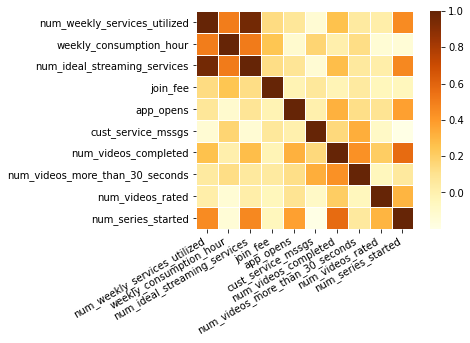

In [118]:
#import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline

# # load the R package ISLR
# infert = com.importr("ISLR")

# # load the Auto dataset
# auto_df = com.load_data('Auto')

# calculate the correlation matrix

corr = subscribers_churn_dummy[['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','join_fee','app_opens','cust_service_mssgs','num_videos_completed','num_videos_more_than_30_seconds','num_videos_rated','num_series_started']].corr()

# plot the heatmap
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, linewidths=.5,
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap = "YlOrBr",square=True)
plt.xticks(rotation=30, horizontalalignment='right')
plt.savefig('corr')
#sns.color_palette("YlOrBr", as_cmap=True)




In [119]:
## num weekly services utilized and num_ideal steaming service very high corr -- 去掉 num ideal
del subscribers_churn_dummy['num_ideal_streaming_services']

In [120]:
df_train, df_test = model_selection.train_test_split(subscribers_churn_dummy, test_size=0.3)

In [121]:
df_train_y = df_train.churn_TF
df_train_x = df_train.copy()
del df_train_x['churn_TF']
del df_train_x['current_sub_TF']

In [122]:
df_test_y = df_test.churn_TF
df_test_x = df_test.copy()
del df_test_x['churn_TF']
del df_test_x['current_sub_TF']

## model

In [123]:
df_train_x.head()

,num_weekly_services_utilized,weekly_consumption_hour,retarget_TF,male_TF,join_fee,payment_period_x,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,package_type_base,package_type_economy,package_type_enhanced,package_type_not_specified,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_not_specified,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_not_specified,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,op_sys_not_specified,age_range_18-24,age_range_25-34,age_range_35-44,age_range_45-54,age_range_55-64,age_range_>65,age_range_unknown
3431,0.000000,0.000000,0,0,0.0000,1,0.971429,0.485714,1.600000,4.457143,0.000000,0.742857,0.571429,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
101422,2.390829,25.851492,0,0,0.0367,0,3.125000,0.875000,5.000000,5.250000,0.000000,0.750000,0.000000,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
56188,3.996200,24.401536,0,0,0.0367,0,1.000000,0.750000,2.500000,5.750000,0.000000,0.500000,0.000000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
17285,4.114025,34.551230,0,1,0.0367,3,1.000000,0.197368,2.815789,4.289474,0.105263,0.973684,1.719626,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
322,0.000000,30.201361,0,0,0.0367,1,1.428571,0.142857,0.142857,1.571429,0.000000,0.000000,0.285714,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


### linear

In [124]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train_y, exog=df_train_x)
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())



RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2777.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:39:26   Log-Likelihood:                -19029.
No. Observations:               92920   AIC:                         3.813e+04
Df Residuals:                   92883   BIC:                         3.848e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

#### backward stepwise by hand

In [127]:
# app_opens
# num_videos_more_than_30_seconds
df_train_x_back1 = df_train_x.copy()
df_test_x_back1 = df_test_x.copy()
del df_train_x_back1['app_opens']
del df_train_x_back1['retarget_TF']
del df_train_x_back1['num_videos_more_than_30_seconds']
del df_test_x_back1['app_opens']
del df_test_x_back1['retarget_TF']
del df_test_x_back1['num_videos_more_than_30_seconds']

In [128]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train_y, exog=df_train_x_back1)
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())



RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     3029.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:40:39   Log-Likelihood:                -19031.
No. Observations:               92920   AIC:                         3.813e+04
Df Residuals:                   92886   BIC:                         3.845e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

### logistic

In [129]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train_y, exog=df_train_x)
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())



         Current function value: 0.224815
         Iterations: 35

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                92920
Model:                          Logit   Df Residuals:                    92883
Method:                           MLE   Df Model:                           36
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                  0.5932
Time:                        17:41:00   Log-Likelihood:                -20890.
converged:                      False   LL-Null:                       -51351.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
num_weekly_services_utilized                -0.0676

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [130]:
# # ----- EVALUATE MODEL PERFORMANCE -----
# # --- evaluate model predictions on test set graphically
# df_test['prob_churn_lpm'] = lpm_results.predict(df_test_x)
# df_test['prob_churn_logit'] = logit_results.predict(df_test_x)

# # plot predictions vs. data
# select_plot_coef = [x for x in df_test_x if x != 'const']
# n_rows = 2
# n_cols = math.ceil(len(select_plot_coef) / n_rows)
# fig, axes = plt.subplots(n_rows, n_cols)
# fig.suptitle('Single factor relationship with churn')
# for i in range(n_rows):
#     for j in range(n_cols):
#         select_coef = select_plot_coef[i * n_cols + j]
#         axes[i, j].plot(df_test[select_coef], df_test['churn_TF'], 'k.')
#         axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
#         axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
#         axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
# fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])
# plt.savefig('predictions vs. data.png')



## performance

In [133]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact


def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 10)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

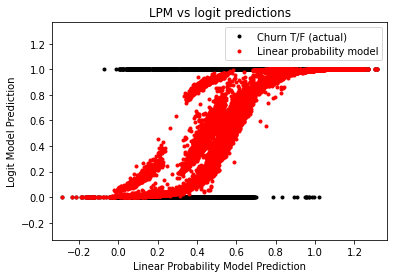

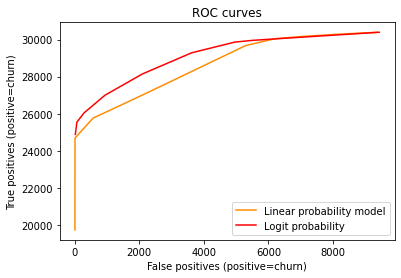

In [134]:

# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test_x_back1)
df_test['prob_churn_logit'] = logit_results.predict(df_test_x)

# # plot predictions vs. data
# select_plot_coef = [x for x in df_test_x if x != 'const']
# n_rows = 2
# n_cols = math.ceil(len(select_plot_coef) / n_rows)
# fig, axes = plt.subplots(n_rows, n_cols)
# fig.suptitle('Single factor relationship with churn')
# for i in range(n_rows):
#     for j in range(n_cols):
#         select_coef = select_plot_coef[i * n_cols + j]
#         axes[i, j].plot(df_test[select_coef], df_test_y, 'k.')
#         axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
#         axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
#         axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
# fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])
# plt.savefig('predictions vs. data.png')

# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']],df_test_y, 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
plt.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])
plt.savefig('compare lpm and logit predictions.png')
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test_y, df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test_y, df_test['prob_churn_lpm'])


ROC_df = pd.DataFrame()
ROC_df['lpm_false_positives'] = lpm_false_positives
ROC_df['lpm_true_positives'] = lpm_true_positives
ROC_df['logit_false_positives'] = logit_false_positives
ROC_df['logit_true_positives'] = logit_true_positives
ROC_df.to_csv('ROC_df.csv')


# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'darkorange')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])
plt.savefig('ROC.png')


## strategies

In [173]:
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.1
threshold = 0.5
base_price = 4.73
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [174]:
df_test['random_draws'] = np.random.random(df_test.shape[0])
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)


In [175]:

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)
    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind


# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    t_discount_amount = t_acceptance_rate_churn
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    t_acceptance_rate_churn = t_discount_amount
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind


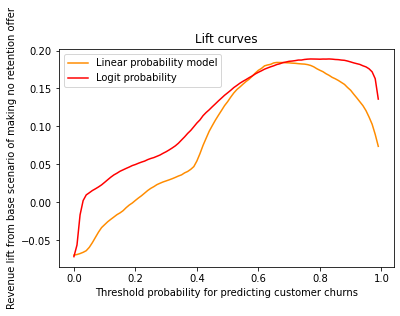

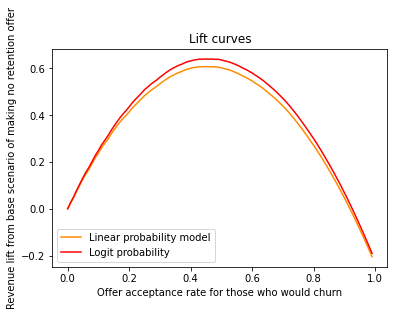

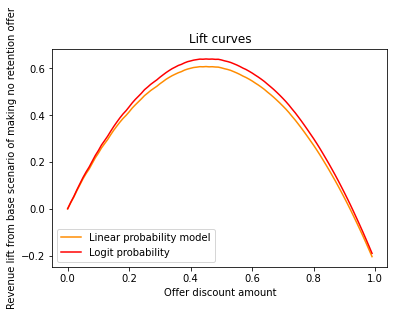

In [176]:

# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'darkorange')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])
plt.savefig('Threshold sensitivity.png')

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'darkorange')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])
plt.savefig('Acceptance rate sensitivity.png')

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'darkorange')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])
plt.savefig('Discount amount sensitivity.png')


In [171]:
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 4.73
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

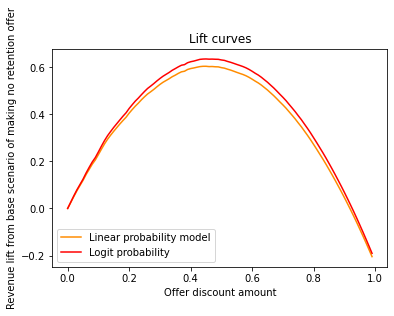

In [172]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'darkorange')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])
plt.savefig('Discount amount sensitivity.png')
